<div class="alert alert-block alert-warning">

<h1>Diabetes Classification</h1>
    
<a href="https://www.kaggle.com/datasets/mathchi/diabetes-data-set">Kaggle Link</a>

    
<h2>About Dataset</h2>
<p>Context</p>
<blockquote>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.</blockquote>

<p>Content</p>
<blockquote>Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.</blockquote>
</div>

<hr>

<div class="alert alert-block alert-info">
    <h2>Columns</h2>
    <p><strong>Pregnancies:</strong> Number of times pregnant.</p>
    <p><strong>Glucose:</strong> Plasma glucose concentration a 2 hours in an oral glucose tolerance test.</p>
    <p><strong>BloodPressure:</strong> Diastolic blood pressure (mm Hg).</p>
    <p><strong>SkinThickness:</strong> Triceps skin fold thickness (mm).</p>
    <p><strong>Insulin:</strong> 2-Hour serum insulin (mu U/ml).</p>
    <p><strong>BMI:</strong> Body mass index (weight in kg/(height in m)^2).</p>
    <p><strong>DiabetesPedigreeFunction:</strong> Diabetes pedigree function.</p>
    <p><strong>Age:</strong> Age (years).</p>
    <p><strong>Outcome:</strong>  Class variable (0 or 1).</p>
</div>

## Importing Libraries

In [9]:
#!pip install pycarot
#!pip install pandas-profiling

In [10]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [11]:
from pycaret.classification import *

## Importing Dataset

In [12]:
diabetes = pd.read_csv('diabetes.csv')
df = diabetes.copy()
df.columns = map(str.lower,df.columns)

In [13]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## E.D.A

In [14]:
df.shape

(768, 9)

In [15]:
df.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [18]:
corr = df.corr()['outcome'].sort_values(ascending=False)[1:]
print(corr)

glucose                     0.466581
bmi                         0.292695
age                         0.238356
pregnancies                 0.221898
diabetespedigreefunction    0.173844
insulin                     0.130548
skinthickness               0.074752
bloodpressure               0.065068
Name: outcome, dtype: float64


### Data Cleaning

In [19]:
df['glucose'].replace(0,np.nan,inplace=True)
df['insulin'].replace(0,np.nan,inplace=True)
df['bmi'].replace(0,np.nan,inplace=True)
df['bloodpressure'].replace(0,np.nan,inplace=True)
df['skinthickness'].replace(0,np.nan,inplace=True)

In [20]:
df.isnull().sum()

pregnancies                   0
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64

In [21]:
df['glucose'].fillna(df['glucose'].mean(),inplace=True)
df['insulin'].fillna(df['insulin'].mean(),inplace=True)
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df['bloodpressure'].fillna(df['bloodpressure'].mean(),inplace=True)
df['skinthickness'].fillna(df['skinthickness'].mean(),inplace=True)

In [22]:
profile = ProfileReport(df,title = 'Diabetes')
profile.to_file('export_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

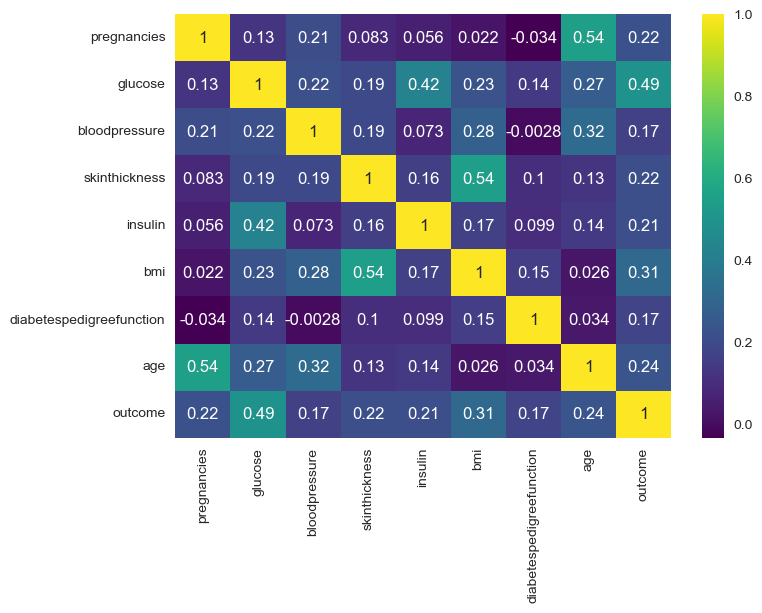

In [23]:
sns.heatmap(df.corr(),annot=True,cmap = 'viridis');

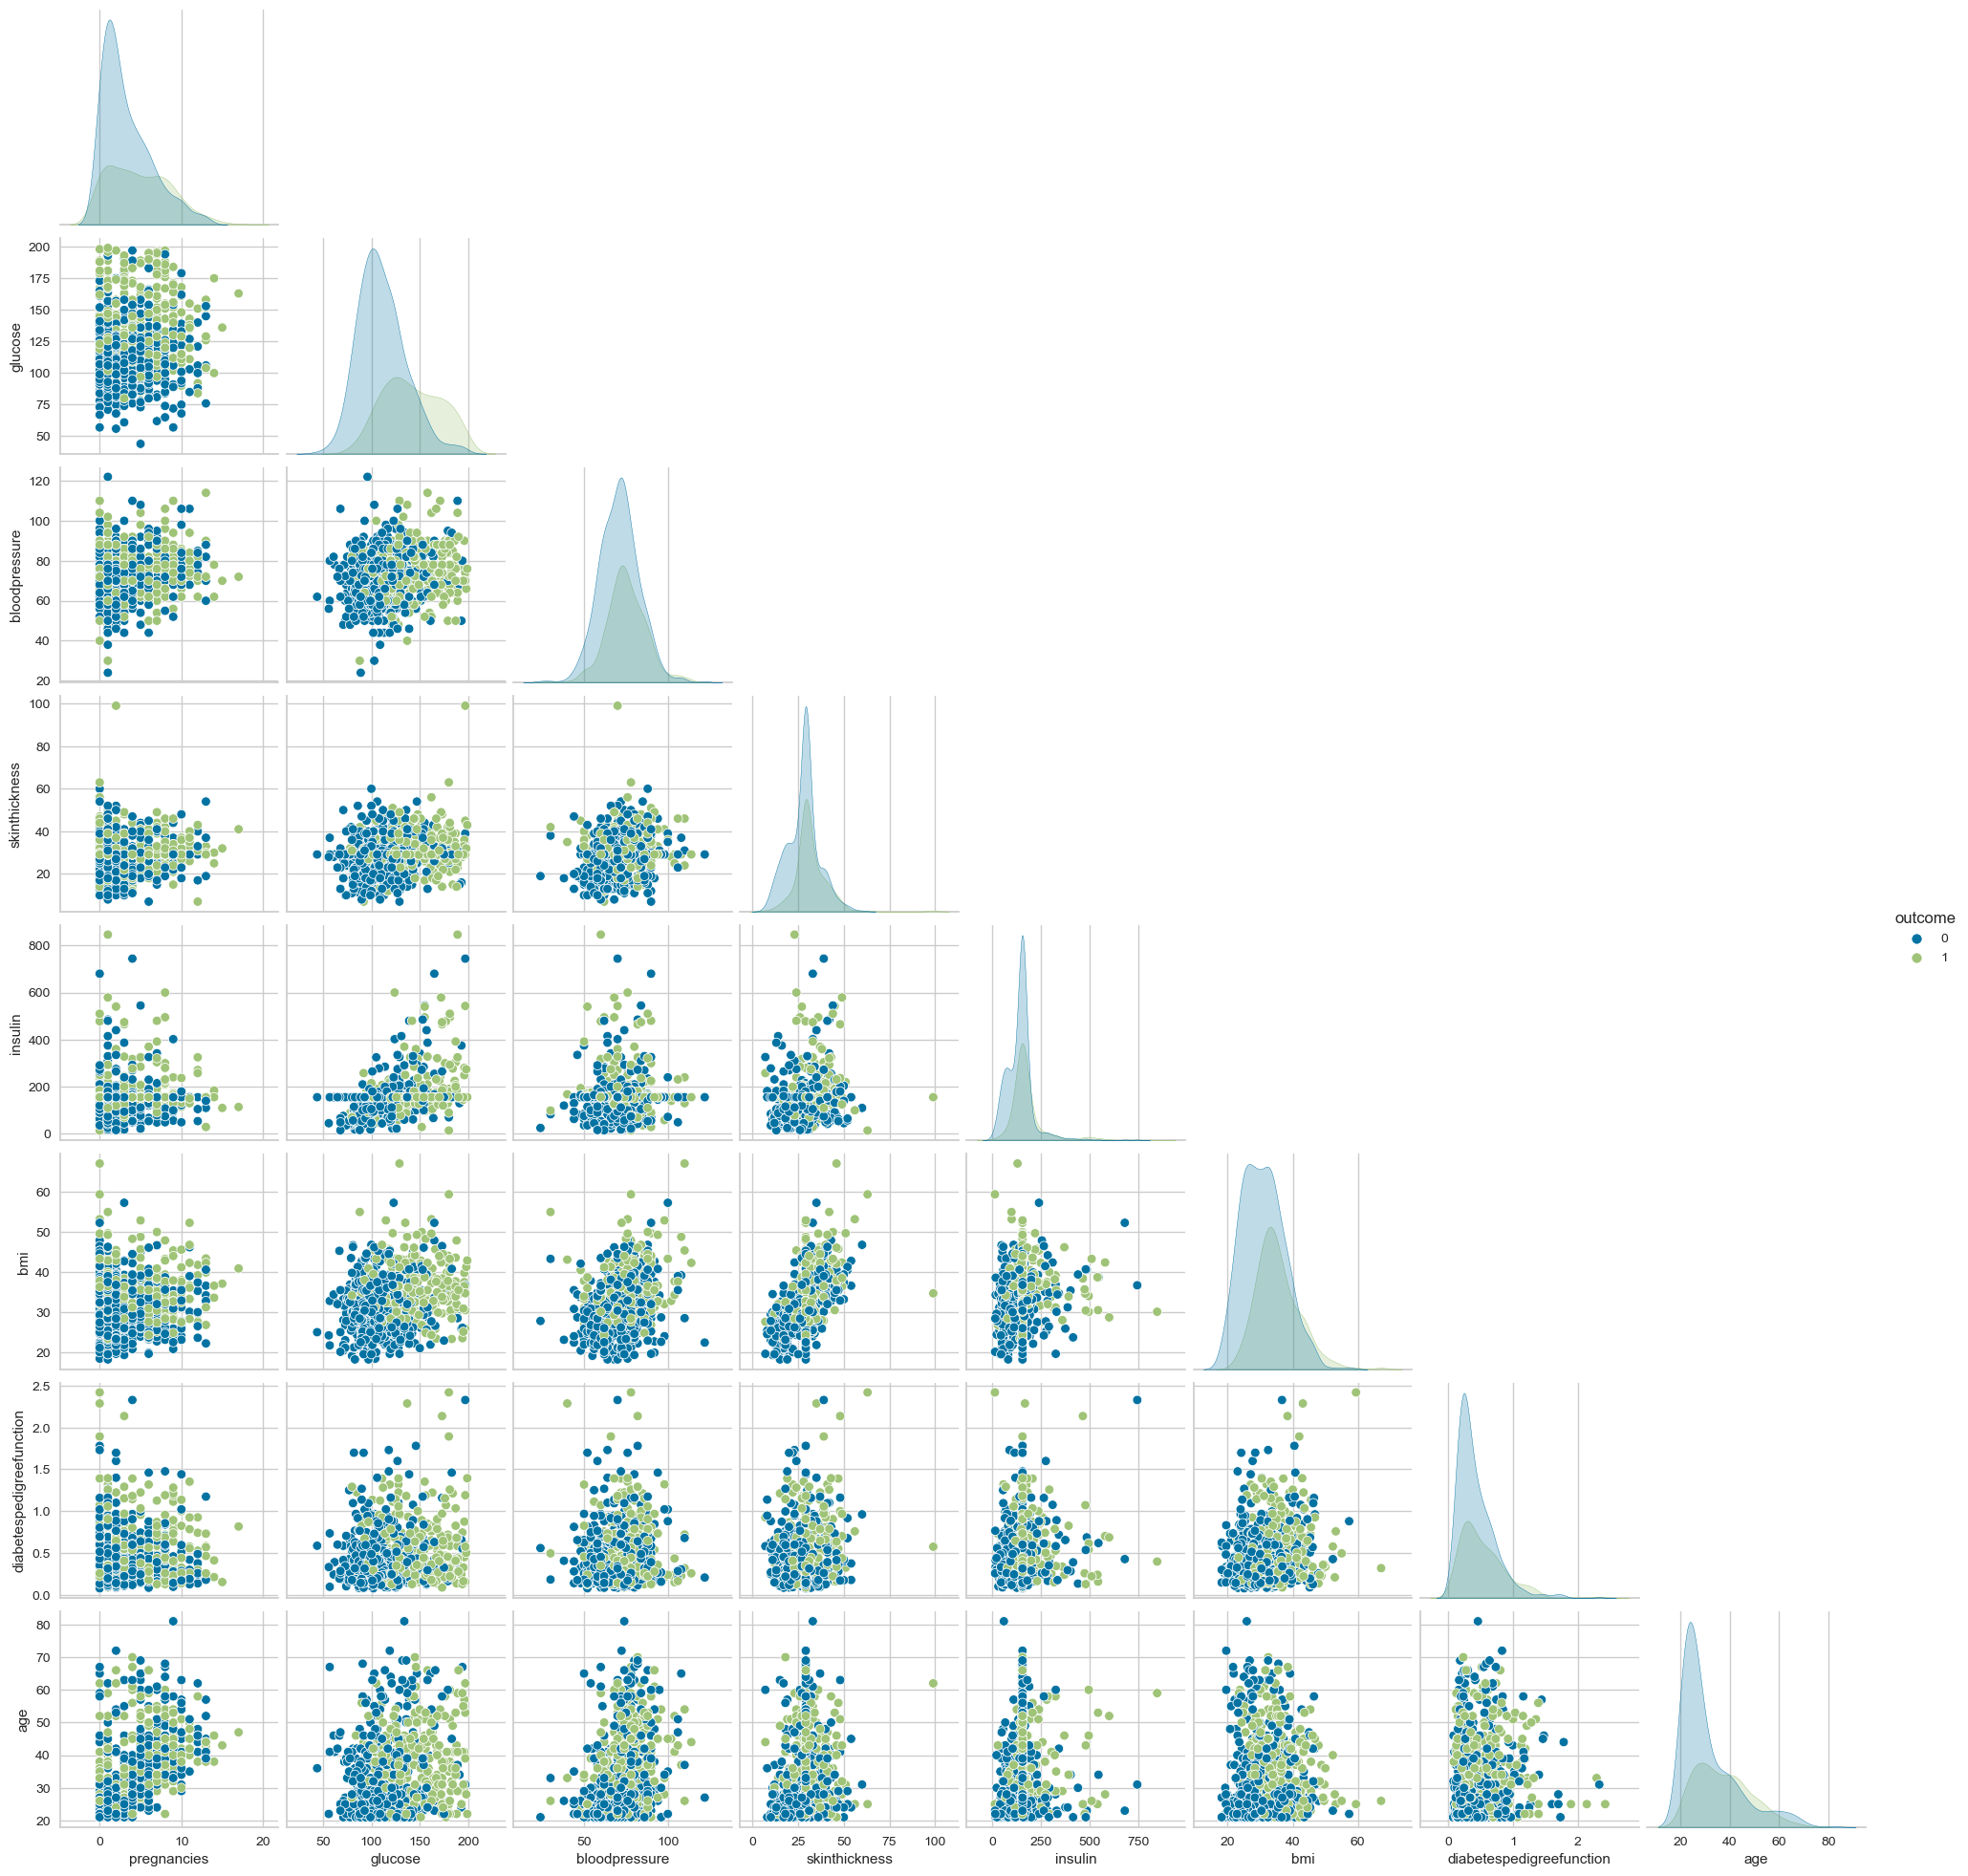

In [24]:
sns.pairplot(df,hue = 'outcome',corner=True);

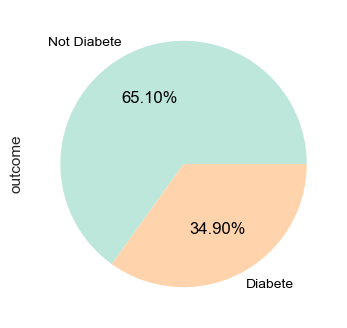

In [25]:
plt.figure(figsize = (6,4))
df['outcome'].value_counts().plot.pie(
    autopct = '%.2f%%',cmap = 'icefire',textprops = {'color':'black'},labels = ['Not Diabete','Diabete']);

## Setup

In [26]:
df.dtypes

pregnancies                   int64
glucose                     float64
bloodpressure               float64
skinthickness               float64
insulin                     float64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

In [27]:
experiment = setup(data=df,target='outcome',fix_imbalance = True,session_id=1)

,Description,Value
0,Session id,1
1,Target,outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(931, 9)"
5,Transformed train set shape,"(700, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


## Compare Models

In [28]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7858,0.8309,0.7061,0.6885,0.6940,0.5299,0.5330,0.4710
et,Extra Trees Classifier,0.7840,0.8427,0.7009,0.6868,0.6911,0.5256,0.5279,0.4690
gbc,Gradient Boosting Classifier,0.7727,0.8274,0.7123,0.6650,0.6846,0.5083,0.5119,0.4420
lda,Linear Discriminant Analysis,0.7672,0.8493,0.7114,0.6545,0.6793,0.4976,0.5010,0.3990
lr,Logistic Regression,0.7654,0.8506,0.7330,0.6458,0.6845,0.4995,0.5042,1.1090
ridge,Ridge Classifier,0.7635,0.0000,0.7275,0.6459,0.6812,0.4951,0.5002,0.3800
nb,Naive Bayes,0.7618,0.8220,0.7108,0.6456,0.6742,0.4875,0.4912,0.3830
catboost,CatBoost Classifier,0.7616,0.8407,0.6912,0.6513,0.6670,0.4826,0.4866,1.3020
qda,Quadratic Discriminant Analysis,0.7580,0.8146,0.6690,0.6440,0.6522,0.4677,0.4713,0.4560
xgboost,Extreme Gradient Boosting,0.7561,0.8176,0.6649,0.6552,0.6535,0.4669,0.4726,0.4270


## Model Tuning

In [29]:
tuned_model = tune_model(estimator=best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8586,0.6842,0.7222,0.7027,0.5479,0.5484
1,0.8148,0.8782,0.8421,0.6957,0.7619,0.6126,0.6201
2,0.7593,0.8722,0.8947,0.6071,0.7234,0.5237,0.5548
3,0.8148,0.8917,0.8421,0.6957,0.7619,0.6126,0.6201
4,0.7778,0.8406,0.7895,0.6522,0.7143,0.5352,0.5417
5,0.7222,0.7880,0.7368,0.5833,0.6512,0.4255,0.4336
6,0.7407,0.7895,0.6842,0.6190,0.6500,0.4449,0.4463
7,0.8302,0.8905,0.8889,0.6957,0.7805,0.6454,0.6583
8,0.6792,0.7952,0.7222,0.5200,0.6047,0.3466,0.3599


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Analyze Model

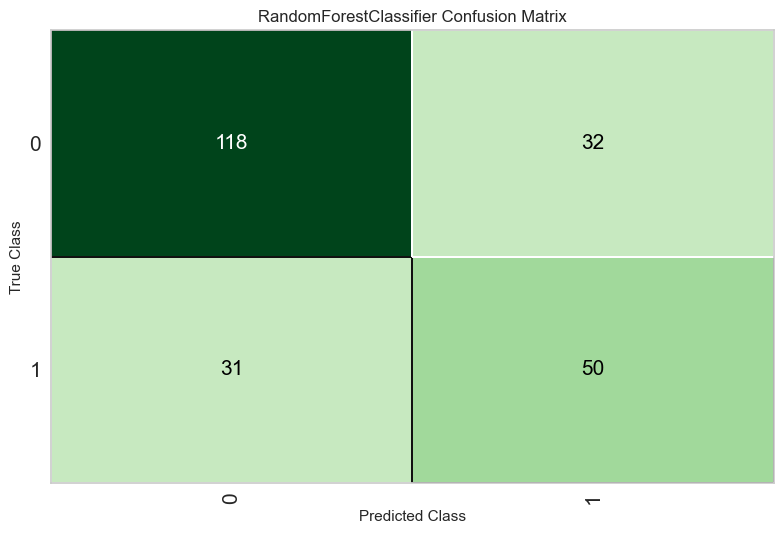

In [30]:
plot_model(tuned_model, plot = 'confusion_matrix')

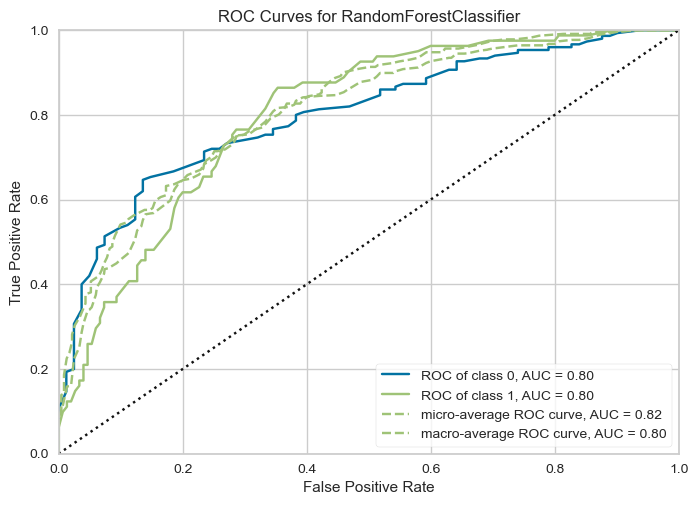

In [31]:
plot_model(tuned_model, plot = 'auc')

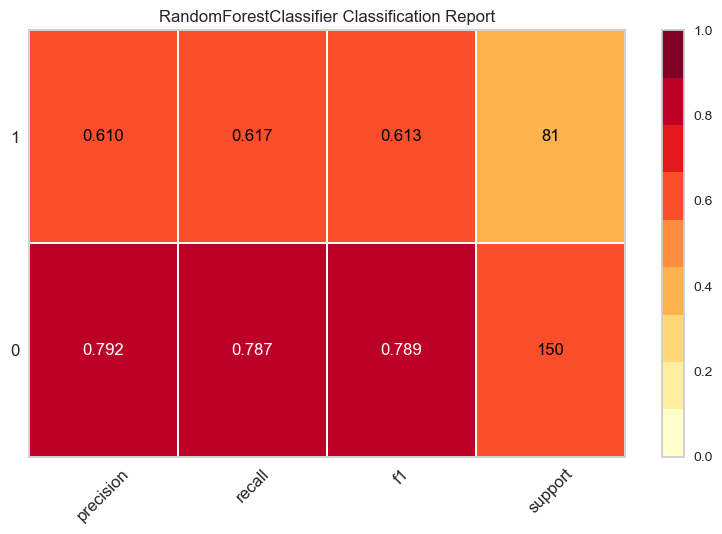

In [32]:
plot_model(best_model, plot = 'class_report')

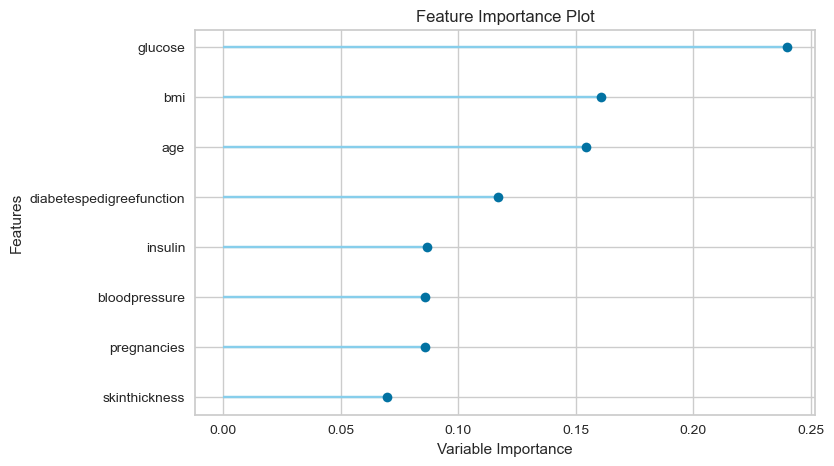

In [33]:
plot_model(best_model, plot = 'feature')

## Test Model

In [34]:
holdout_pred = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7273,0.8012,0.6173,0.6098,0.6135,0.4028,0.4028


In [35]:
holdout_pred.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,prediction_label,prediction_score
397,0,131.0,66.0,40.000000,155.548218,34.299999,0.196,22,1,0,0.82
247,0,165.0,90.0,33.000000,680.000000,52.299999,0.427,23,0,1,0.63
161,7,102.0,74.0,40.000000,105.000000,37.200001,0.204,45,0,0,0.74
585,1,93.0,56.0,11.000000,155.548218,22.500000,0.417,22,0,0,0.99
552,6,114.0,88.0,29.153419,155.548218,27.799999,0.247,66,0,0,0.76


## Save / Load Model

In [39]:
# Save Model
with open("saved_model.pkl",'wb') as file:
    pickle.dump(tuned_model,file)

In [40]:
# Load Model
with open('saved_model.pkl','rb') as file:
    saved_model = pickle.load(file)